# Visualize Camera Poses of Calibration Images 

In [1]:
! pip install pandas matplotlib scipy numpy

  Using cached pandas-2.3.3-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached scipy-1.16.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.3.3-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.8 MB)
Using cached scipy-1.16.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.9 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]


Camera Poses:
   image_id        rx        ry        rz         tx        ty       tz
0         0  0.529167  0.038702 -0.024201 -146.07600  -24.2753  231.154
1         1  0.051895 -0.244394  3.128250  138.34500   94.1024  256.656
2         2 -0.216464  0.022920 -0.011034 -149.03600 -149.0550  280.261
3         3 -0.350606  0.020253 -0.011952 -150.48900 -165.0680  361.200
4         4 -0.397939 -0.295519 -0.078781  -40.24650 -115.2090  278.643
5         5 -0.014930 -0.276883 -0.026774   -8.11559  -97.9149  279.666
6         6 -0.031956  0.223913 -0.023967 -187.91600  -85.6373  342.600
7         7 -0.540504 -0.067597 -3.036070   68.50730  113.4250  256.809
8         8  0.013552  0.438285  0.350496  -94.03830 -158.5630  339.710
9         9  0.097030 -0.329219  0.079099   12.82820 -150.0350  457.198



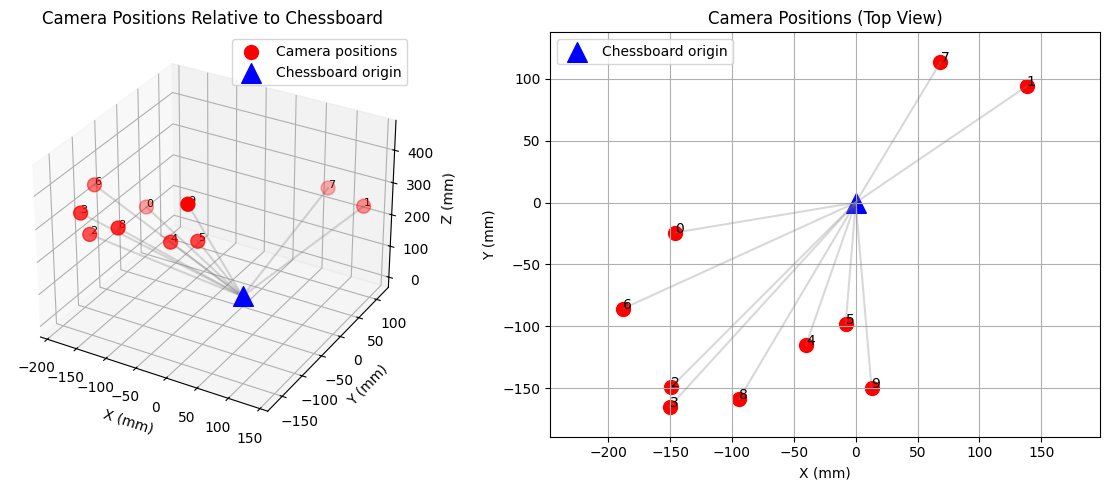

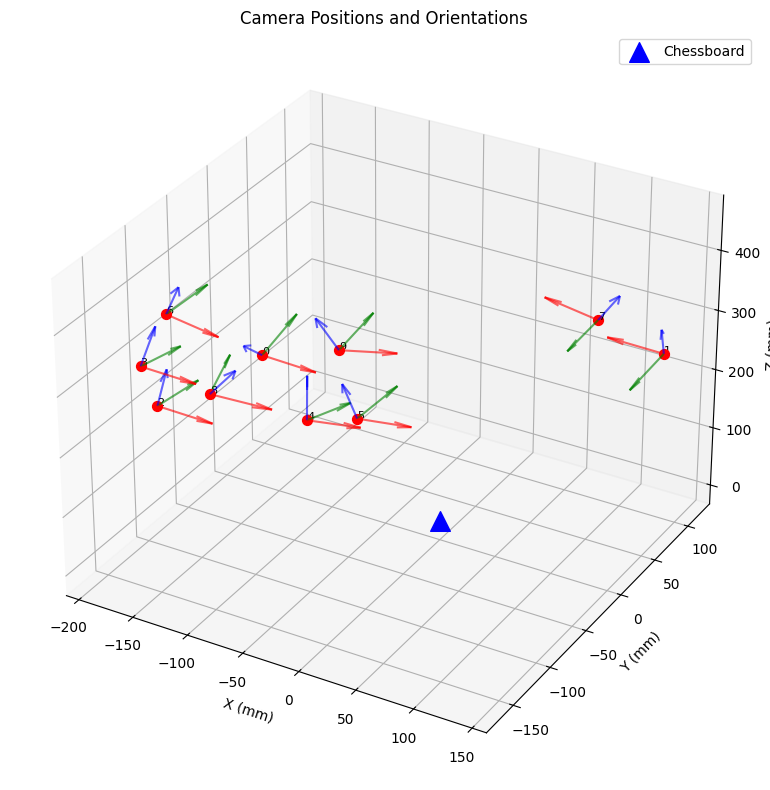

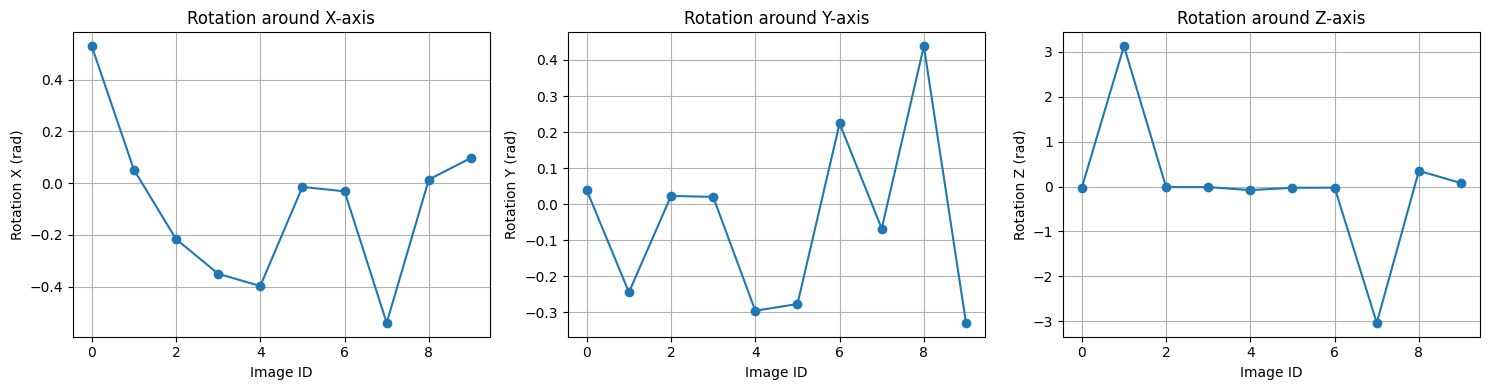

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read calibration parameters
# calib_df = pd.read_csv('calibration_results.csv')
# print("Calibration Parameters:")
# print(calib_df)
# print()

# Read camera poses
poses_df = pd.read_csv('camera_poses.csv')
print("Camera Poses:")
print(poses_df)
print()

# Extract translation vectors
tx = poses_df['tx'].values
ty = poses_df['ty'].values
tz = poses_df['tz'].values

# Visualize camera positions in 3D
fig = plt.figure(figsize=(12, 5))

# 3D plot of camera positions
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(tx, ty, tz, c='red', marker='o', s=100, label='Camera positions')
ax1.scatter(0, 0, 0, c='blue', marker='^', s=200, label='Chessboard origin')

# Draw lines from origin to each camera
for i in range(len(tx)):
    ax1.plot([0, tx[i]], [0, ty[i]], [0, tz[i]], 'gray', alpha=0.3)
    ax1.text(tx[i], ty[i], tz[i], f'{i}', fontsize=8)

ax1.set_xlabel('X (mm)')
ax1.set_ylabel('Y (mm)')
ax1.set_zlabel('Z (mm)')
ax1.set_title('Camera Positions Relative to Chessboard')
ax1.legend()
ax1.grid(True)

# 2D projection (top view)
ax2 = fig.add_subplot(122)
ax2.scatter(tx, ty, c='red', marker='o', s=100)
ax2.scatter(0, 0, c='blue', marker='^', s=200, label='Chessboard origin')

for i in range(len(tx)):
    ax2.plot([0, tx[i]], [0, ty[i]], 'gray', alpha=0.3)
    ax2.text(tx[i], ty[i], f'{i}', fontsize=10)

ax2.set_xlabel('X (mm)')
ax2.set_ylabel('Y (mm)')
ax2.set_title('Camera Positions (Top View)')
ax2.grid(True)
ax2.axis('equal')
ax2.legend()

plt.tight_layout()
# plt.savefig('camera_positions.png', dpi=300, bbox_inches='tight')
plt.show()

# Convert rotation vectors to rotation matrices and visualize
from scipy.spatial.transform import Rotation

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot chessboard origin
ax.scatter(0, 0, 0, c='blue', marker='^', s=200, label='Chessboard')

# Plot camera positions and orientations
for i in range(len(poses_df)):
    # Camera position
    pos = np.array([tx[i], ty[i], tz[i]])
    
    # Rotation vector (Rodrigues)
    rvec = np.array([poses_df.loc[i, 'rx'], 
                     poses_df.loc[i, 'ry'], 
                     poses_df.loc[i, 'rz']])
    
    # Convert to rotation matrix
    rot = Rotation.from_rotvec(rvec)
    R = rot.as_matrix()
    
    # Camera coordinate axes (in camera frame)
    axis_length = 50  # mm
    x_axis = R @ np.array([axis_length, 0, 0])
    y_axis = R @ np.array([0, axis_length, 0])
    z_axis = R @ np.array([0, 0, axis_length])
    
    # Plot camera position
    ax.scatter(pos[0], pos[1], pos[2], c='red', marker='o', s=50)
    
    # Plot camera orientation axes
    ax.quiver(pos[0], pos[1], pos[2], x_axis[0], x_axis[1], x_axis[2], 
              color='r', alpha=0.6, arrow_length_ratio=0.3)
    ax.quiver(pos[0], pos[1], pos[2], y_axis[0], y_axis[1], y_axis[2], 
              color='g', alpha=0.6, arrow_length_ratio=0.3)
    ax.quiver(pos[0], pos[1], pos[2], z_axis[0], z_axis[1], z_axis[2], 
              color='b', alpha=0.6, arrow_length_ratio=0.3)
    
    ax.text(pos[0], pos[1], pos[2], f'{i}', fontsize=8)

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_title('Camera Positions and Orientations')
ax.legend()
ax.grid(True)

plt.tight_layout()
# plt.savefig('camera_orientations.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot rotation angles over images
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(poses_df['image_id'], poses_df['rx'], 'o-')
axes[0].set_xlabel('Image ID')
axes[0].set_ylabel('Rotation X (rad)')
axes[0].set_title('Rotation around X-axis')
axes[0].grid(True)

axes[1].plot(poses_df['image_id'], poses_df['ry'], 'o-')
axes[1].set_xlabel('Image ID')
axes[1].set_ylabel('Rotation Y (rad)')
axes[1].set_title('Rotation around Y-axis')
axes[1].grid(True)

axes[2].plot(poses_df['image_id'], poses_df['rz'], 'o-')
axes[2].set_xlabel('Image ID')
axes[2].set_ylabel('Rotation Z (rad)')
axes[2].set_title('Rotation around Z-axis')
axes[2].grid(True)

plt.tight_layout()
# plt.savefig('rotation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Display distortion coefficients
# print("\nDistortion Coefficients:")
# k_coeffs = calib_df[calib_df['parameter'].str.startswith('k')]
# print(k_coeffs)